<div style="text-align:center; padding:20px;">

<h1 style="color:#1F618D;">📊 Telco Customer Churn Analysis</h1>

<h3>Data Cleaning • Feature Engineering • Statistical Analysis • EDA</h3>

<br>

<b>Name:</b> Abhi Aravind  
<br>
<b>Project:</b> Data Analytics Final Project  

<br><br>

</div>


---
## 🔷 Problem Definition

The objective of this project is to analyze customer churn in a telecom company.
Customer churn refers to customers who stop using the company’s services.
By analyzing the dataset, we aim to understand the factors that influence customer churn and prepare the data for further exploratory data analysis and visualization.

---
## 🔷 Dataset Description

The dataset used in this project is the Telco Customer Churn dataset.
It contains information about customers such as gender, tenure, type of contract, monthly charges, total charges, and whether the customer has churned or not.

The dataset has around 7000+ customer records and multiple columns describing customer demographics, services used, and billing information.
The target column in this dataset is Churn, which indicates whether the customer left the company (Yes) or stayed (No).

This dataset helps in understanding customer behavior and identifying patterns that lead to customer churn.

In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# to check the dataset size

In [4]:
print("Rows:", df.shape[0])
print("columns:",df.shape[1])

Rows: 7043
columns: 21


In [5]:
# to check the column names

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# dataset informations

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# to find the missing values

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# to check the no. of unique values 

In [12]:
for col in df.columns:
    print(col,":",df[col].nunique())

customerID : 7043
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 73
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1585
TotalCharges : 6531
Churn : 2


In [13]:
# Target column distribution

In [14]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [15]:
# churn percentage


In [16]:
(df["Churn"].value_counts(normalize=True)*100).round(2)

Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64

---
## 🔷 Data Cleaning and Preprocessing

In [17]:
# Due to an safety purpose first make the copy of original data set


In [18]:
df2=df.copy()

In [19]:
# To check the duplicates

In [20]:
df2.duplicated().sum()

np.int64(0)

In [21]:
df2.drop_duplicates(inplace=True)

In [22]:
# converting total charges into number

In [23]:
df2["TotalCharges"]=pd.to_numeric(df2["TotalCharges"],errors="coerce")

In [24]:
df2["TotalCharges"].isnull().sum()

np.int64(11)

In [25]:
# Handling missing values

In [26]:
df2["TotalCharges"].dtype

dtype('float64')

In [27]:
df2["TotalCharges"].isnull().sum()

np.int64(11)

In [28]:
# due to the error we wnt to do the above things once again

In [29]:
import pandas as pd
import numpy as np

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df2 = df.copy()


In [30]:
df2["TotalCharges"].head(14)


0       29.85
1      1889.5
2      108.15
3     1840.75
4      151.65
5       820.5
6      1949.4
7       301.9
8     3046.05
9     3487.95
10     587.45
11      326.8
12     5681.1
13     5036.3
Name: TotalCharges, dtype: object

In [31]:
# Now we convert the total charges

In [32]:
df2["TotalCharges"] = df2["TotalCharges"].replace(" ", np.nan)
df2["TotalCharges"] = pd.to_numeric(df2["TotalCharges"])


In [33]:
#Checking missing values

In [34]:
df2["TotalCharges"].isnull().sum()


np.int64(11)

In [35]:
# filling the missing values

In [36]:
df2["TotalCharges"] = df2["TotalCharges"].fillna(df2["TotalCharges"].median())


In [37]:
df2["TotalCharges"].isnull().sum()


np.int64(0)

In [38]:
# converting churn

In [39]:
df2["Churn"]=df2["Churn"].map({"Yes":1, "No":0})

In [40]:
#Convert senior citizen

In [41]:
df2["SeniorCitizen"] = df2["SeniorCitizen"].map({0: "No", 1: "Yes"})


In [42]:
# save

In [43]:
df2.to_csv("Telco_Customer_Churn_Cleaned.csv", index=False)
print("✅ Cleaned dataset saved successfully!")


✅ Cleaned dataset saved successfully!


In [44]:
df2["TotalCharges"].isnull().sum()

np.int64(0)

---
## 🟩 DATA CLEANING PROCESS

The dataset was cleaned and preprocessed before analysis.

First, the dataset was loaded into pandas and a copy was created for cleaning.
Duplicate rows were checked to ensure there were no repeated records.

The TotalCharges column was originally stored as text and also contained blank values.
So it was converted into numeric format and missing values were handled using the median value of the column.

The Churn column was converted from Yes/No into numeric values (1 and 0) to make analysis easier.
All columns were checked again to confirm that there were no missing values remaining.

Finally, the cleaned dataset was saved as a new CSV file for further analysis and visualization.

---
## 🔷 Feature Engineering

In [45]:
import pandas as pd
import numpy as np

# To load cleaned dataset 
df2 = pd.read_csv("Telco_Customer_Churn_Cleaned.csv")

df2.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Tenure Group column

To Group customers based on how long they stayed.

In [46]:
df2["TenureGroup"] = pd.cut(
    df2["tenure"],
    bins=[0, 12, 24, 48, 60, 72],
    labels=["0-12", "13-24", "25-48", "49-60", "61-72"]
)


## Monthly charge Group

In [47]:
df2["MonthlyChargeGroup"]=pd.cut(
    df2["MonthlyCharges"],
    bins=[0,35,70,100,200],
    labels=["Low","Medium","High","VeryHigh"]
)

## Total Charges Group

In [48]:
df2["TotalChargeGroup"] = pd.cut(
    df2["TotalCharges"],
    bins=4,
    labels=["Low", "Medium", "High", "Very High"]
)


In [49]:
# to check the columns

In [50]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,MonthlyChargeGroup,TotalChargeGroup
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-12,Low,Low
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,0,25-48,Medium,Low
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-12,Medium,Low
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,25-48,Medium,Low
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-12,High,Low


In [51]:
df2.to_csv("Telco_Customer_Churn_Cleaned.csv", index=False)


---
## Feature Engineering

New columns were created to improve analysis.  
Customers were grouped based on tenure and monthly charges to understand patterns more clearly.  
These new features help in visualizing churn behavior across different customer groups.



---
## 📊 Statistical Analysis

In [52]:
# Summery Statistics
df2.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928,0.265370
std,24.559481,30.090047,2265.270398,0.441561
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,402.225000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


---
## 🔹 Summary Statistics Interpretation

The dataset contains 7043 customers.
Average tenure is around 32 months, indicating a mix of new and long-term customers.
The average monthly charge is ₹64.7, with a wide range of pricing plans.

This variation suggests pricing and tenure may influence churn behavior.

In [53]:
# Mean Values By Churn

In [54]:
df2.groupby("Churn")[["MonthlyCharges","tenure","TotalCharges"]].mean()


,MonthlyCharges,tenure,TotalCharges
Churn,,,
0,61.265124,37.569965,2552.882494
1,74.441332,17.979133,1531.796094


---
## 🔹 Mean Comparison (Churn vs Non-Churn)

Customers who churned show:

Higher monthly charges

Lower tenure

Lower total charges

This indicates that new customers paying higher monthly fees are more likely to churn.

Long-term customers with accumulated total charges are more stable.

In [55]:
## Correlation Analysis

In [56]:
df2.corr(numeric_only=True)


,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.247900,0.825464,-0.352229
MonthlyCharges,0.247900,1.000000,0.650864,0.193356
TotalCharges,0.825464,0.650864,1.000000,-0.199037
Churn,-0.352229,0.193356,-0.199037,1.000000


---
## 🔹 Correlation Analysis Interpretation

Key relationships:

Tenure vs Churn → Negative correlation

Monthly Charges vs Churn → Positive correlation

Total Charges vs Churn → Negative correlation

Meaning:

Customers staying longer are less likely to churn

Higher monthly cost increases churn probability

Long-term customers generate higher lifetime value

In [57]:
# Median Comparison

In [58]:
df2.groupby("Churn")[["MonthlyCharges","tenure"]].median()


,MonthlyCharges,tenure
Churn,,
0,64.425,38.0
1,79.650,10.0


---
## 🔹 Median Comparison Insight

Median tenure for churned customers is only 10 months,
while retained customers have a median tenure of 38 months.

This confirms that early-stage customers are at highest risk of churn.

Customer retention strategies should focus on the first year of service.

# Contract vs Churn Percentage

In [59]:
pd.crosstab(df2["Contract"], df2["Churn"], normalize="index") * 100


Churn,0,1
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


---
##  🔹 Contract Type vs Churn Percentage

Churn rate by contract:

Contract Type	Churn %
Month-to-month	~43%
One-year	~11%
Two-year	~3%

---
## Statistical Analysis

Statistical analysis was performed to understand customer behavior.  
Mean and median values of tenure, monthly charges, and total charges were compared for churned and non-churned customers.  
Correlation analysis was also done to identify relationships between variables.  
Cross-tabulation was used to analyze churn patterns across contract types and tenure groups.

# 📊 Exploratory Data Analysis (EDA)

The goal of EDA is to understand customer behavior and identify patterns that influence churn.  
The analysis is divided into:

• Univariate Analysis – understanding individual variables  
• Bivariate Analysis – relationship with churn  
• Multivariate Analysis – combined impact  
• Correlation Analysis – numerical relationships


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns


---
## 🔹 UNIVARIATE ANALYSIS

##  1) Churn Distribution

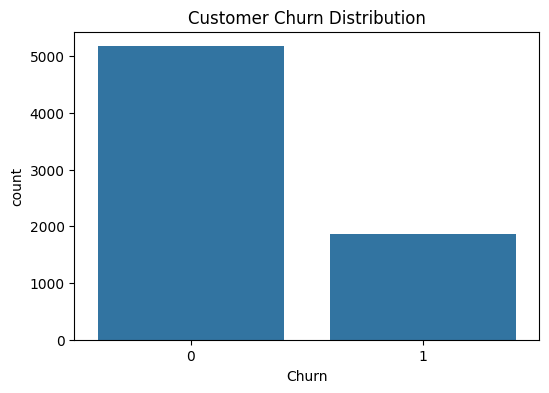

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df2)
plt.title("Customer Churn Distribution")
plt.show()


**Why this chart?**  
To understand the overall proportion of customers who churned vs retained.

**How it helps:**  
Class balance helps determine churn severity and business impact.

**Insights:**  
• Majority of customers are retained  
• However, churn rate is significant  
• Retention strategies are required


## 2) Tenure Distribution

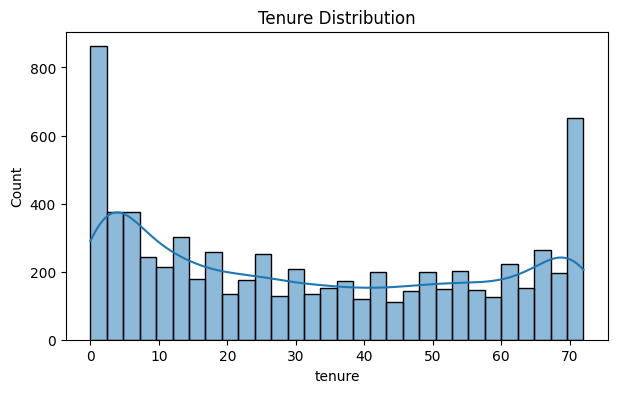

In [62]:
plt.figure(figsize=(7,4))
sns.histplot(df2["tenure"], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.show()


**Why this chart?**  
Shows how long customers stay with the company.

**How it helps:**  
Helps identify whether new or long-term customers dominate.

**Insights:**  
• Many customers have low tenure  
• Indicates frequent new customer acquisition  
• Early churn risk is high


 ## 3) Monthly Charges Distribution

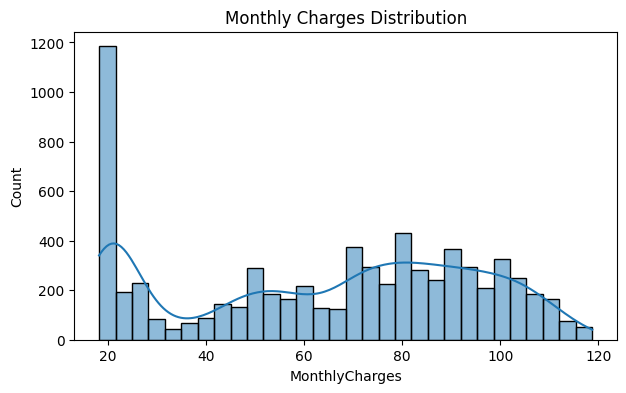

In [63]:
plt.figure(figsize=(7,4))
sns.histplot(df2["MonthlyCharges"], bins=30, kde=True)
plt.title("Monthly Charges Distribution")
plt.show()


**Why this chart?**  
To understand pricing distribution.

**How it helps:**  
Pricing patterns influence customer decisions.

**Insights:**  
• Charges vary widely  
• Some customers pay very high monthly fees  
• Pricing may affect churn


## 4) Gender Distribution

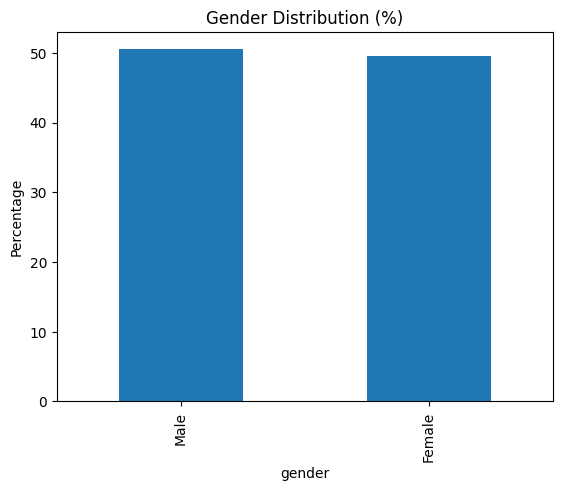

In [64]:
gender_pct = df2["gender"].value_counts(normalize=True)*100
gender_pct.plot(kind="bar")
plt.title("Gender Distribution (%)")
plt.ylabel("Percentage")
plt.show()



**Why this chart?**
Shows customer composition by gender.

**How it helps:**
Checks if churn is gender-biased.

**Insight:**
Gender distribution is balanced → churn not driven by gender.

## 5) Contract Type Distribution

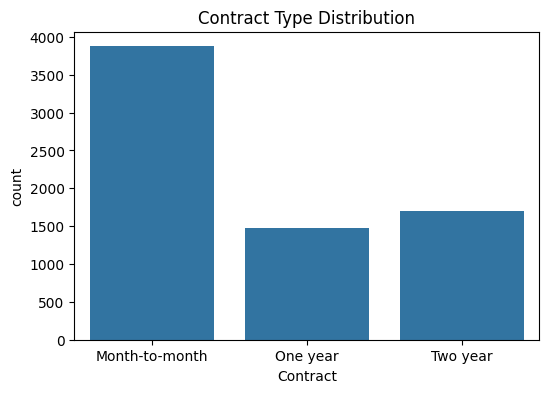

In [65]:
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", data=df2)
plt.title("Contract Type Distribution")
plt.show()


**Why this chart?**
 Shows most common contract type.

**How it helps:**
Identifies high-risk customer groups.

**Insight:**
Most customers use month-to-month plans → higher churn risk.

## 🔹 BIVARIATE ANALYSIS

## 1) Contract Type vs Churn

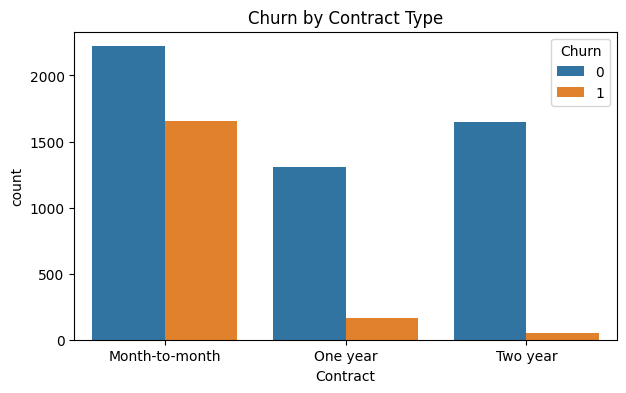

In [66]:
plt.figure(figsize=(7,4))
sns.countplot(x="Contract", hue="Churn", data=df2)
plt.title("Churn by Contract Type")
plt.show()


**Why this chart?**  
Shows relationship between contract type and churn.

**How it helps:**  
Contract duration affects customer retention.

**Insights:**  
• Month-to-month customers churn the most  
• Long-term contracts reduce churn  
• Contract type is a strong churn factor


## 2) Tenure vs Churn

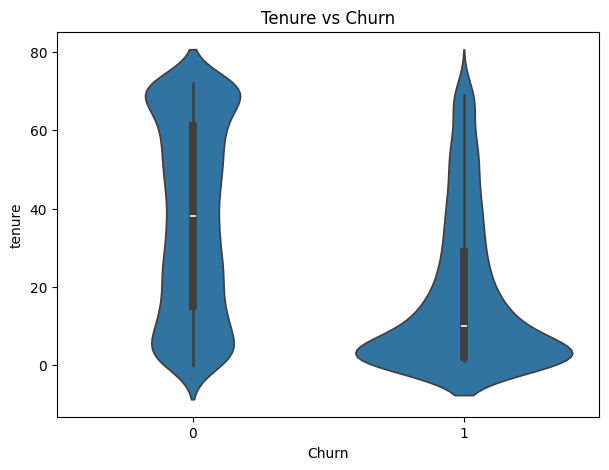

In [67]:
plt.figure(figsize=(7,5))
sns.violinplot(x="Churn", y="tenure", data=df2)
plt.title("Tenure vs Churn")
plt.show()


**Why this chart?**  
Compares tenure distribution for churned vs retained customers.

**How it helps:**  
Shows whether long-term customers churn less.

**Insights:**  
• Low-tenure customers churn more  
• Long-term customers are loyal  
• Early retention is critical


## 3) Monthly Charges vs Churn

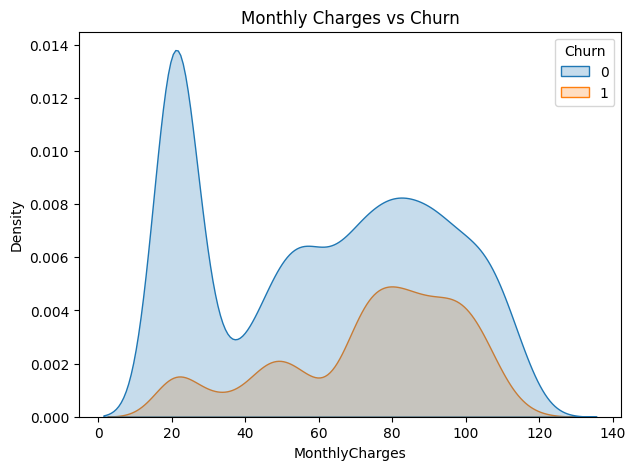

In [68]:
plt.figure(figsize=(7,5))
sns.kdeplot(data=df2, x="MonthlyCharges", hue="Churn", fill=True)
plt.title("Monthly Charges vs Churn")
plt.show()


**Why this chart?**  
Shows pricing differences between churned and retained customers.

**How it helps:**  
Identifies whether high cost leads to churn.

**Insights:**  
• High monthly charges increase churn  
• Price sensitivity affects retention  
• Premium users require better service value


## 4)Payment Method vs Churn

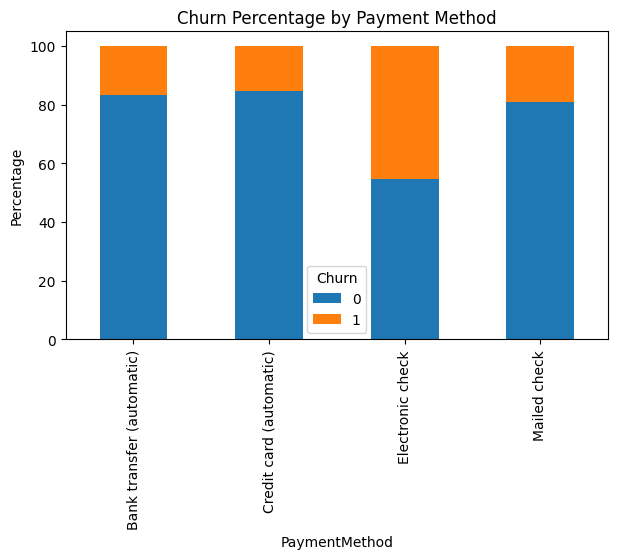

In [69]:
ct = pd.crosstab(df2["PaymentMethod"], df2["Churn"], normalize="index")*100
ct.plot(kind="bar", stacked=True, figsize=(7,4))
plt.title("Churn Percentage by Payment Method")
plt.ylabel("Percentage")
plt.show()


**Why this chart?**  
This chart shows how churn varies across different payment methods.  
It helps understand whether payment behavior influences customer retention.

**How it helps:**  
Payment method is a behavioral indicator of customer stability.  
Identifying high-churn payment types helps the company improve billing experience and automate retention strategies.

**Insights:**  
• Customers using electronic check show the highest churn percentage.  
• Customers using automatic payment methods (credit card or bank transfer) have lower churn.  
• Auto-payment users tend to stay longer, indicating higher commitment.  
• Manual payment methods may indicate less engagement and higher risk of churn.  
• Encouraging customers to switch to automatic payment could improve retention rates.


## 5) Churn Rate by Contract & internet service

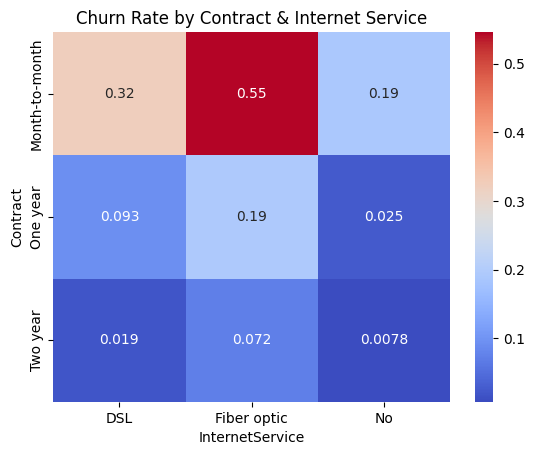

In [70]:
pivot = pd.crosstab(df2["Contract"], df2["InternetService"], df2["Churn"], aggfunc="mean")
sns.heatmap(pivot, annot=True, cmap="coolwarm")
plt.title("Churn Rate by Contract & Internet Service")
plt.show()


**Why this chart?**  
This heatmap compares churn rates across different combinations of contract type and internet service.  
It helps identify high-risk customer segments where churn is concentrated.

**How it helps:**  
By analyzing churn at a segment level, the company can target retention strategies more effectively.  
It highlights which contract–service combinations are most vulnerable to customer loss.

**Insights:**  
• Customers with month-to-month contracts and fiber optic service show the highest churn rate.  
• Long-term contracts (one-year and two-year) significantly reduce churn across all service types.  
• Customers without long-term commitment are more likely to leave.  
• Fiber optic users have higher churn compared to DSL users, indicating possible pricing or service issues.  
• Retention efforts should focus on month-to-month fiber customers, as they represent the highest-risk segment.


## 7) Tenure + Monthly Charges + Churn

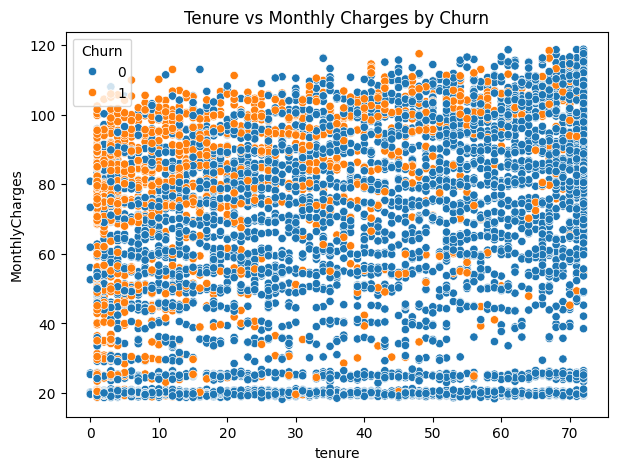

In [71]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="tenure", y="MonthlyCharges", hue="Churn", data=df2)
plt.title("Tenure vs Monthly Charges by Churn")
plt.show()


**Why this chart?**  
Shows combined effect of tenure and pricing on churn.

**How it helps:**  
Identifies high-risk customer segments.

**Insights:**  
• Customers with low tenure and high charges churn most  
• Long-tenure customers remain stable  
• High-price new customers are risky


### 🔹 CORRELATION ANALYSIS

## 8) Correlation Heatmap

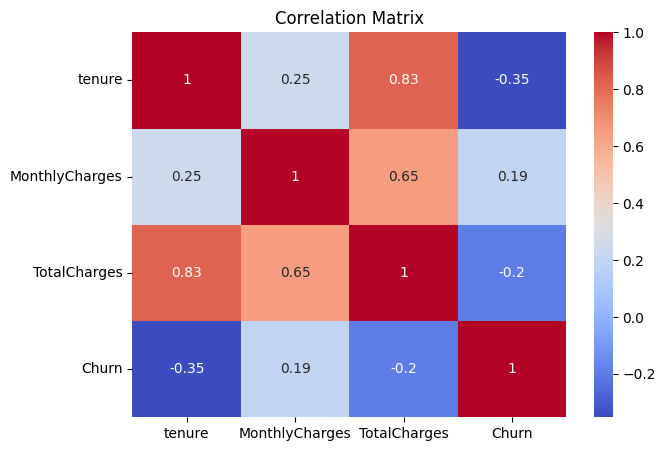

In [72]:
plt.figure(figsize=(7,5))
sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


**Why this chart?**  
Shows relationships between numerical variables.

**How it helps:**  
Identifies strongest factors influencing churn.

**Insights:**  
• Tenure has strong negative correlation with churn  
• Monthly charges slightly increase churn  
• Total charges relate to tenure  
• Tenure is strongest churn predictor


## 📊 Key Insights

### Customer Behaviour
• A significant portion of customers remain with the company, but a noticeable segment still churns, indicating retention improvement opportunities.  
• Customer churn is not random — it is strongly influenced by contract type, tenure, pricing, and service usage.

### Contract Type Impact
• Month-to-month customers have the highest churn rate.  
• Customers with one-year and two-year contracts show much lower churn.  
• Longer contract commitment significantly improves customer retention.  

➡ Insight: Contract duration is one of the strongest indicators of churn.

---

### Tenure Impact
• Customers with shorter tenure are far more likely to churn.  
• Long-term customers (high tenure) show strong loyalty and low churn probability.  
• Early customer lifecycle is the most critical churn period.

➡ Insight: First-year retention strategies are crucial for business stability.

---

### Pricing & Charges
• Customers with higher monthly charges show higher churn probability.  
• High-paying customers expect better service quality and value.  
• Price sensitivity plays a major role in customer retention.

➡ Insight: Expensive plans require stronger value delivery and support.

---

### Internet Service Type
• Fiber optic customers show higher churn compared to DSL users.  
• Customers without internet service have the lowest churn.  

➡ Insight: Service quality or expectations in fiber plans may be affecting retention.

---

### Payment Method Impact
• Customers using electronic check have the highest churn rate.  
• Customers using automatic payment methods (bank transfer/card) show better retention.  

➡ Insight: Automatic payment users are more stable and loyal.

---
### Combined Risk Group
Highest churn seen in customers who are:
• Month-to-month contract  
• High monthly charges  
• Low tenure  
• Electronic check payment  

This is the **most critical customer segment**.



## 💡 BUSINESS RECOMMENDATIONS

## Recommendations

### 1. Improve Early Customer Experience
Focus on customers in first 6–12 months:

• Welcome offers  
• Customer support follow-ups  
• Onboarding guidance  

This can reduce early churn significantly.

---

### 2. Encourage Long-Term Contracts
Offer:

• Discounts for yearly plans  
• Loyalty rewards  
• Upgrade benefits  

Longer contracts = lower churn.

---

### 3. Target High-Charge Customers
Customers paying more should get:

• Priority support  
• Better service reliability  
• Exclusive benefits  

High-value customers must feel valued.

---

### 4. Improve Fiber Service Experience
Since fiber users churn more:

• Check service quality  
• Improve speed consistency  
• Reduce complaints  

This segment needs attention.

---

### 5. Promote Auto-Payment
Encourage:

• Auto bank payment  
• Card auto-pay discounts  

Automatic payments increase retention.

---

### 6. Create Churn Prediction Strategy
Company should build a model to:

• Identify high-risk customers  
• Send retention offers early  
• Reduce revenue loss


## 🧾 CONCLUSION

## Conclusion

This analysis explored customer churn behavior using demographic, service, and billing data.

Key findings show that churn is strongly influenced by:
• Contract type  
• Customer tenure  
• Monthly charges  
• Payment method  
• Internet service type  

Customers with short tenure, high monthly charges, and month-to-month contracts are most likely to churn.

By focusing on early retention strategies, improving service quality, and encouraging long-term contracts, the company can significantly reduce churn and improve customer loyalty.

This project demonstrates how data analysis can provide actionable business insights and support strategic decision-making.


## ➡ Future Scope



This project can be extended further by:

• Building a churn prediction machine learning model  
• Creating a dashboard using Power BI or Tableau  
• Performing customer segmentation  
• Using advanced feature engineering  
• Deploying a churn alert system  

These steps can help the company move from analysis to real-time decision making.
